## Collating the data into one data file

In [1]:
from data_collator import generate_final_data
generate_final_data()

Level 60:root:Processing file: cleaned_data.csv
Level 60:root:Processing file: data.csv
Level 60:root:Processing file: final_data.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:root:Processing file: January 09 2024.csv
Level 60:root:Processing file: January 10 2024.csv
Level 60:root:Processing file: January 11 2024.csv
Level 60:root:Processing file: January 12 2024.csv
Level 60:root:Processing file: January 13 2024.csv
Level 60:root:Processing file: January 14 2024.csv
Level 60:root:Processing file: January 15 2024.csv
Level 60:root:Processing file: January 16 2024.csv
Level 60:root:Processing file: January 17 2024.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:root:Processing file: January 09 2024.csv
Level 60:root:Processing file: January 10 2024.csv
Level 60:root:Processing file: January 11 2024.csv
Level 60:root:Processing file: January 12 2024.csv
Level 60:root:Processing file: January 13 2024.csv
Level 60:root:Processing file: January 14 2024.csv

In [2]:
import pandas as pd
from utils import *

In [3]:
data = pd.read_csv('data/data.csv')

In [4]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087H235,CAD,2.00,3.33%,Aaa,06/01/2028,94.55,94.77,08/01/2017,94.660
1,CA135087N266,CAD,1.50,3.27%,Aaa,12/01/2031,87.68,87.82,10/25/2021,87.750
2,CA135087L443,CAD,0.50,3.28%,Aaa,12/01/2030,83.08,83.17,10/05/2020,83.125
3,CA135087M847,CAD,1.25,3.61%,Aaa,03/01/2027,93.13,93.15,10/15/2021,93.140
4,CA135087M276,CAD,1.50,3.28%,Aaa,06/01/2031,88.36,88.50,4/26/2021,88.430
...,...,...,...,...,...,...,...,...,...,...
401,CA135087VH40,CAD,9.00,4.22%,Aaa,6/1/2025,106.11,106.23,8/2/1994,106.170
402,CA135087Q640,CAD,3.50,4.20%,Aaa,8/1/2025,98.91,98.98,5/12/2023,98.945
403,CA135087Q806,CAD,4.50,4.07%,Aaa,11/1/2025,100.72,100.73,8/4/2023,100.725
404,CA135087R226,CAD,4.50,3.88%,Aaa,2/1/2026,101.08,101.21,11/1/2023,101.145


In [5]:
data = data.loc[data.groupby('ISIN')['Ask'].idxmax()]

In [6]:
data.reset_index(inplace=True)

In [7]:
data.drop('index', axis=1, inplace=True)

In [8]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.50,5.01%,Aaa,6/1/2024,99.09,99.10,7/2/2013,99.095
1,CA135087D507,CAD,2.25,4.21%,Aaa,6/1/2025,97.36,97.49,6/30/2014,97.425
2,CA135087E679,CAD,1.50,3.70%,Aaa,6/1/2026,95.13,95.26,7/21/2015,95.195
3,CA135087F825,CAD,1.00,3.42%,Aaa,6/1/2027,92.35,92.68,8/3/2016,92.515
4,CA135087H235,CAD,2.00,3.26%,Aaa,6/1/2028,94.93,95.06,8/1/2017,94.995


In [9]:
data.to_csv('data/cleaned_data.csv', index=False)

In [10]:
data = pd.read_csv('data/cleaned_data.csv')

In [11]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.50,5.01%,Aaa,6/1/2024,99.09,99.10,7/2/2013,99.095
1,CA135087D507,CAD,2.25,4.21%,Aaa,6/1/2025,97.36,97.49,6/30/2014,97.425
2,CA135087E679,CAD,1.50,3.70%,Aaa,6/1/2026,95.13,95.26,7/21/2015,95.195
3,CA135087F825,CAD,1.00,3.42%,Aaa,6/1/2027,92.35,92.68,8/3/2016,92.515
4,CA135087H235,CAD,2.00,3.26%,Aaa,6/1/2028,94.93,95.06,8/1/2017,94.995


In [12]:
data['Maturity Date'] = pd.to_datetime(data['Maturity Date'], format='%m/%d/%Y')
data['Issue Date'] = pd.to_datetime(data['Issue Date'], format='%m/%d/%Y')

In [13]:
data = get_bonds(data)

In [14]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.500,5.01%,Aaa,2024-06-01,99.09,99.10,2013-07-02,99.095
1,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.425
2,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.195
3,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.515
4,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.995
5,CA135087J397,CAD,2.250,3.19%,Aaa,2029-06-01,95.43,95.67,2018-07-27,95.550
6,CA135087J546,CAD,2.250,4.88%,Aaa,2024-03-01,99.64,99.70,2018-10-05,99.670
7,CA135087J967,CAD,1.500,4.77%,Aaa,2024-09-01,97.98,98.06,2019-04-05,98.020
8,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.675
9,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.550


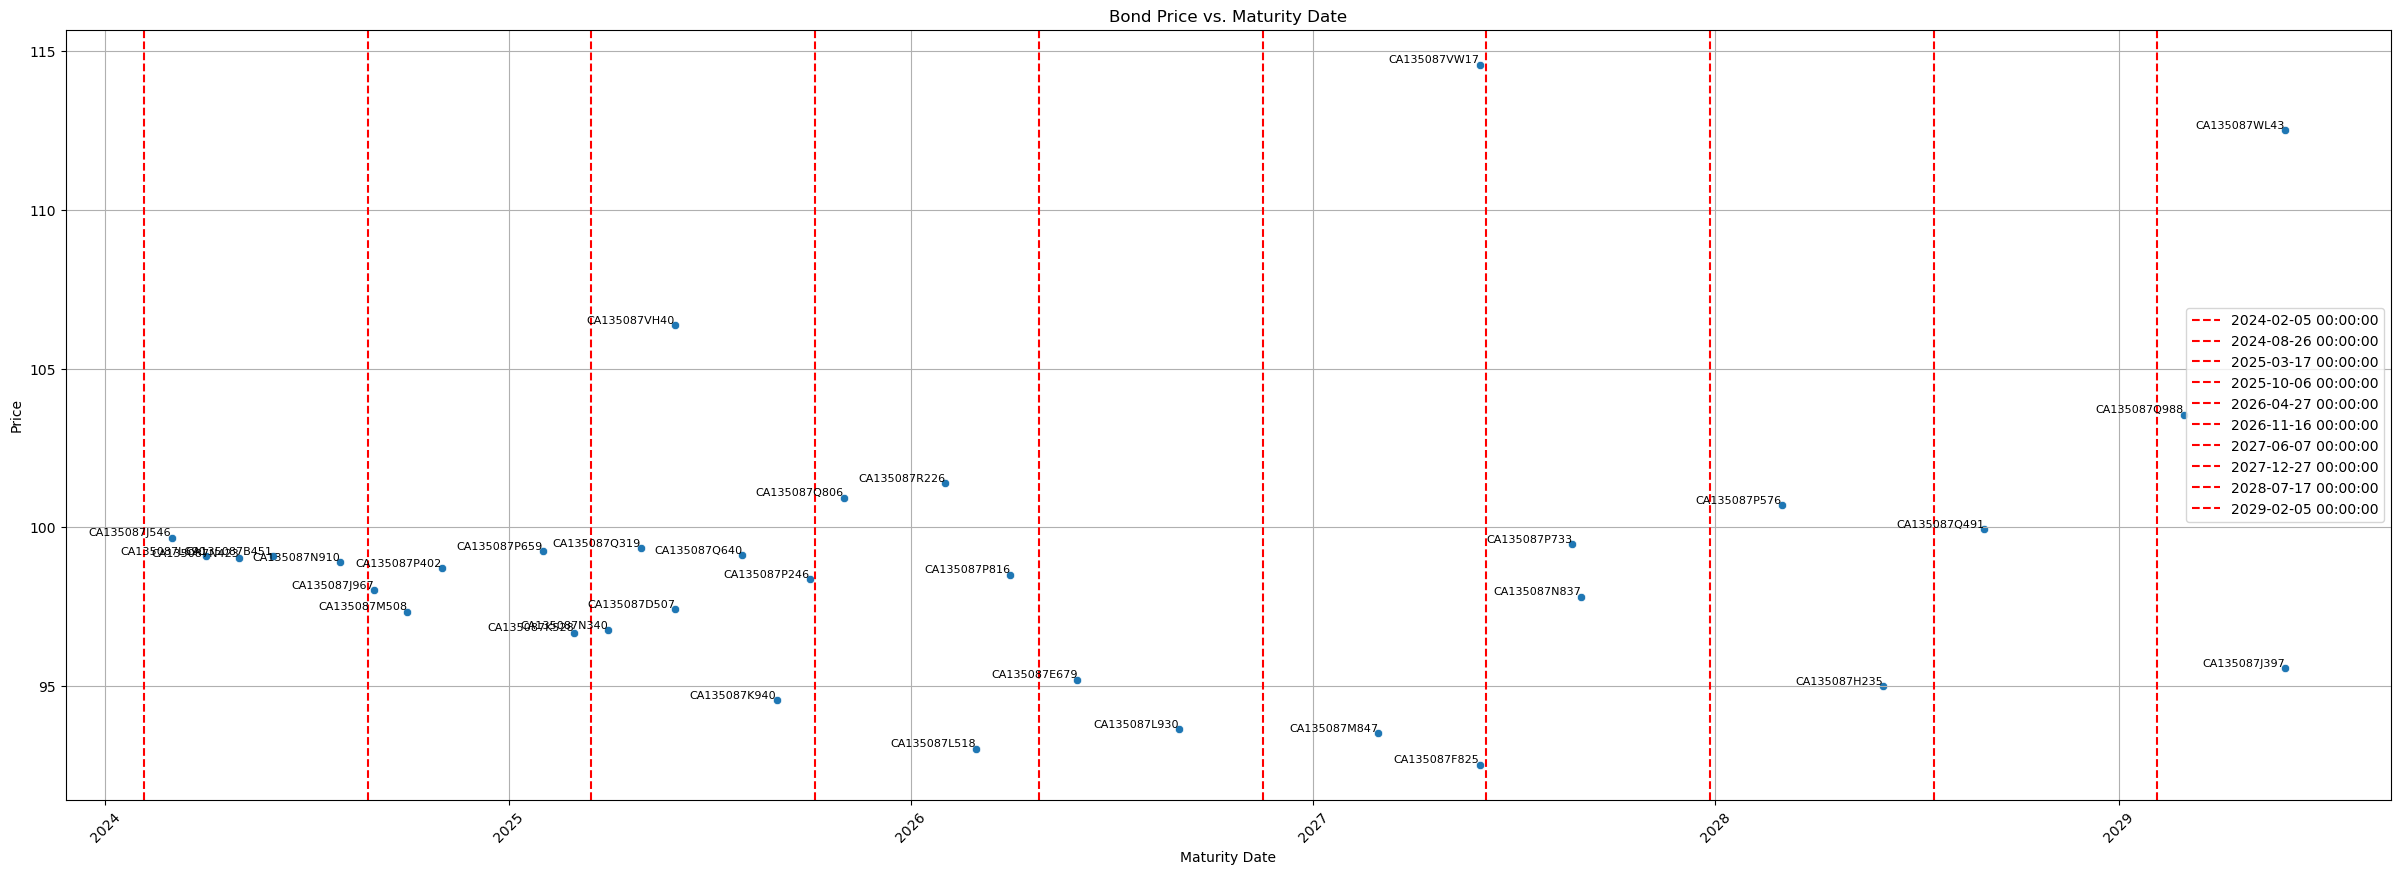

In [15]:
plot_bonds_price(data)